# Exercise 11.3

# MULTIVARIATE FIT

## Set Up

#### DEFS

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [3]:
def f(x, y):
    return np.sin(x*x + y*y)

In [44]:
sig = .1
n_points = 10000
n_valid = 1000
epochs = 50
#epochs = 30
bsize = 32

#### SYNTHETIC DATA GENERATION

In [45]:
np.random.seed(0) 
x_train = np.random.uniform(-1.5, 1.5, n_points)
x_valid = np.random.uniform(-1.5, 1.5, n_valid)
y_train = np.random.uniform(-1.5, 1.5, n_points)
y_valid = np.random.uniform(-1.5, 1.5, n_valid)

x_target = np.arange(-1.5, 1.5, .01)
y_target = np.arange(-1.5, 1.5, .01)
z_target = f(x_target, y_target)

sigma = sig
z_train = np.random.normal(f(x_train, y_train), sigma)
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

#### PLOT

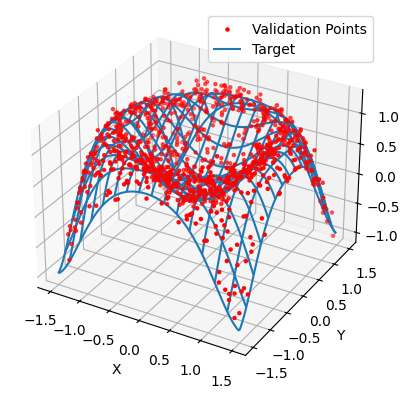

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_valid, y_valid, z_valid, c='r', marker='.', label='Validation Points')
x_plot, y_plot = np.meshgrid(x_target, y_target)
ax.plot_wireframe(x_plot, y_plot, f(x_plot, y_plot), rstride=20, cstride=20, label='Target')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

## Training

In [52]:
random.seed(0)
model = tf.keras.Sequential([tf.keras.Input(shape=(2,)), Dense(64)])

def_act = 'relu'
model.add(Dense(12, activation = def_act)) 
model.add(Dense(42, activation = 'tanh'))
model.add(Dense(30, activation = def_act))
model.add(Dense(20, activation = 'tanh'))
model.add(Dense(25, activation = def_act))
model.add(Dense(1, activation = def_act))

opt = 'sgd'
#opt = 'nadam'
#opt = 'adadelta'
loss = 'mse'
model.compile(optimizer=opt, loss=loss, metrics=['mse'])

coord_train = np.column_stack((x_train,y_train))     
coord_valid = np.column_stack((x_valid,y_valid))  
history = model.fit(x=coord_train, y=z_train, batch_size=bsize, epochs=epochs, shuffle=True, validation_data=(coord_valid, z_valid))

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1999 - mse: 0.1999 - val_loss: 0.1466 - val_mse: 0.1466
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1570 - mse: 0.1570 - val_loss: 0.1400 - val_mse: 0.1400
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1437 - mse: 0.1437 - val_loss: 0.1280 - val_mse: 0.1280
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1285 - mse: 0.1285 - val_loss: 0.1165 - val_mse: 0.1165
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1125 - mse: 0.1125 - val_loss: 0.1028 - val_mse: 0.1028
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0984 - mse: 0.0984 - val_loss: 0.0838 - val_mse: 0.0838
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0784 - mse: 0.0784 - val_loss: 0.0662 - val_mse: 0.0662
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0639 - mse: 0.0639 - val_loss: 0.0486 - val_mse: 0.0486
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

## Results

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


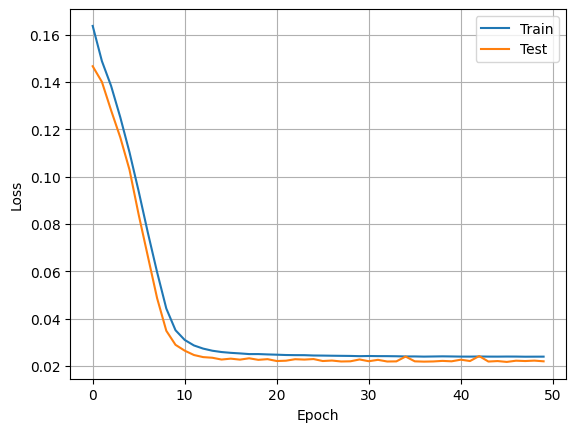

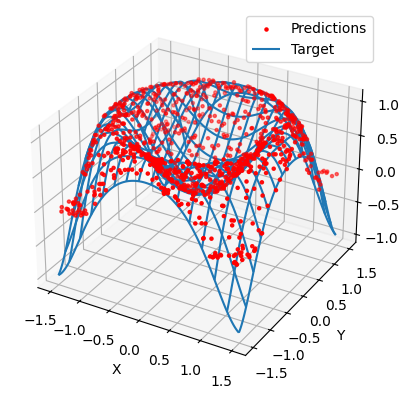

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test']) #, loc='best')
plt.grid()

# PREDICTIONS
x_pred = np.random.uniform(-1.5, 1.5, 1000) 
y_pred = np.random.uniform(-1.5, 1.5, 1000) 
coord_pred = np.column_stack((x_pred,y_pred))
z_pred = model.predict(coord_pred).flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pred, y_pred, z_pred, c='r', marker='.', label='Predictions')
x_plot, y_plot = np.meshgrid(x_target, y_target)
ax.plot_wireframe(x_plot, y_plot, f(x_plot, y_plot), rstride=20, cstride=20, label='Target')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()